<a href="https://colab.research.google.com/github/j23-cs167/project1-Venamax21/blob/main/Project1_New_vena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project \#1 Starter Code: 
Your first step is to decide which dataset you would like to work with for this project. 

For this project, you will get to choose what dataset you use. The ones we've used in class (other than Iris/Titanic as they're pretty small) are all fair game (wine quality, breast cancer, spotify). 

Here are some other possibilities--Kaggle has many many more. It might be a good idea to double check with me before grabbing a dataset that's not listed here:
- 🥑 [Avocado Prices](https://www.kaggle.com/datasets/neuromusic/avocado-prices)
- 🎟️ [Admission to University](https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university)
- 🏎️ [Speed Dating](https://www.kaggle.com/datasets/whenamancodes/speed-dating)
- 🎓 [World University Ranking](https://www.kaggle.com/datasets/whenamancodes/world-university-ranking-2022-2023)
- 📸 [Top Instagram Influencers](https://www.kaggle.com/datasets/whenamancodes/top-200-influencers-crushing-on-instagram)
- 🌦️ [Weather Prediction](https://www.kaggle.com/datasets/thedevastator/weather-prediction)
- 🤑 [Student Monthly Expenses](https://www.kaggle.com/datasets/shariful07/nice-work-thanks-for-share)
- 🍺 [Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)
- 🏫 [College Score Card](https://www.kaggle.com/datasets/thedevastator/u-s-department-of-education-college-scorecard-da)
- 🎮 [IMDB Video Games](https://www.kaggle.com/datasets/muhammadadiltalay/imdb-video-games)
- 🎵 [Spotify Recommendation](https://www.kaggle.com/datasets/bricevergnou/spotify-recommendation)

In [347]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [348]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
import pandas as pd
import numpy
from sklearn import neighbors
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor

path = '/content/drive/MyDrive/ColabNotebooks/CS167Datasets/winequality-white.csv' 
data = pd.read_csv(path)

#1. Name: VANLAL VENA

# 2. Data Description
Answer the following questions:
- Explain what dataset you chose, and why you chose it. 
- Specify which columns you are using as your __predictor variables__
- What variable are you selecting as your __target variable__? 
- In selecting this target variable, does this make your problem a __classification__ or a __regression__? 

I chose wine quality datasets because it's all in numeric which makes it easier for me to work with.

Predictor Variable: All columns except Alcohol column

Target Variable: Alcohol

Regression because my target variable is numeric

# 3. Research Question
As clearly/specifcially as possible, state the question you are trying to solve in this project.
> For example, if I was working with the Iris dataset, I might ask 'how accurately can we predict the species of Iris from these 4 measurements?'

How much influence do the other columns have in predicting the alcohol column?





# 4. Data Preparation
Explain your data prep. What did you do to get your data in the shape for your experiments? (e.g. creation of dummy variables, filling in missing values, etc). 

Alcohol will be the target variable and all other columns will be predictor variables.
Split the data into four sections: training data, test data, train solution and test solution. 20% of the datasets are for testing. Datasets will also be normalized.

In [349]:
# data prep code 
predictors = data.columns.drop('alcohol')
target= 'alcohol'
train_data, test_data, train_sln, test_sln = \
        train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)


# 5. Metrics
Identify which metrics you will be using to test your model and say why they are appropriate.

I will be using Mean Squared Error (MSE) metrics because I want to see how close my predictions are to actual values.

# 6. Baseline Performance
Identify a baseline for your metrics - what would you expect to happen with this particular data if you always guessed the average or if you guessed randomly? What did some of the unsuccessful machine learning algorithms yield?

Some helpful links:
- [Sklearn Dummy Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html)

In [350]:
from sklearn.dummy import DummyRegressor
from sklearn import metrics

dummy_regr = DummyRegressor() # will always predict the average of the target column
#regression fit will train the training data 
dummy_regr.fit(train_data, train_sln) 
preds = dummy_regr.predict(test_data)
#Calculating the mean squared error 
print('MSE: ', metrics.mean_squared_error(test_sln, preds))


MSE:  1.125772561772195


In [351]:
# build and test a baseline model here

# 7. Model planning and Execution
Identify which learning algorithms you have tried and which important parameters you’ve tuned for each one. Basically make your plan to test your research question and then test it.


In [431]:
3#Create model
knn = neighbors.KNeighborsRegressor()
w_knn = neighbors.KNeighborsRegressor(weights = 'distance')
dt = tree.DecisionTreeRegressor()
R_forest = RandomForestRegressor()

4#Call fit()
knn.fit(train_data, train_sln)
w_knn.fit(train_data, train_sln)
dt.fit(train_data, train_sln)
R_forest.fit(train_data, train_sln)

5#Get Predictions
knn_Pred = knn.predict(test_data)
w_knn_Pred = w_knn.predict(test_data)
dt_Pred = dt.predict(test_data)
R_forest_Pred = R_forest.predict(test_data)

#PREDICTIONS = REGRESSION(TEST_DATA, TRAIN_DATA) FROM NOTEBOOK 3
#Predictions = knn(test_data, train_data)
#6 Evaluate the model
from sklearn import metrics
print("KNN MSE: ", metrics.mean_squared_error(knn_Pred, test_sln))
print("W_KNN MSE: ", metrics.mean_squared_error(w_knn_Pred, test_sln))
print("Decision Tree MSE: ", metrics.mean_squared_error(dt_Pred, test_sln))
print("Forest MSE: ", metrics.mean_squared_error(R_forest_Pred, test_sln))


KNN MSE:  0.945805520879421
W_KNN MSE:  0.7872218707750245
Decision Tree MSE:  0.42404340277711816
Forest MSE:  0.25713148177151074


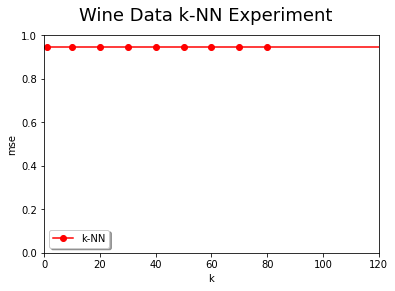

In [356]:
#KNN GRAPH
k_vals = [1,10,20,30,40,50,60,70,80,129]
kNN_accuracies = []
for k in k_vals:
  current_accuracy = metrics.mean_squared_error(knn_Pred, test_sln)
  kNN_accuracies.append(current_accuracy)

plt.suptitle('Wine Data k-NN Experiment', fontsize = 18)
plt.xlabel('k')
plt.ylabel('mse')
plt.plot(k_vals,kNN_accuracies, 'ro-', label = 'k-NN')
plt.legend(loc='lower left', shadow = True)
plt.axis([0, 120, 0, 1])

plt.show()

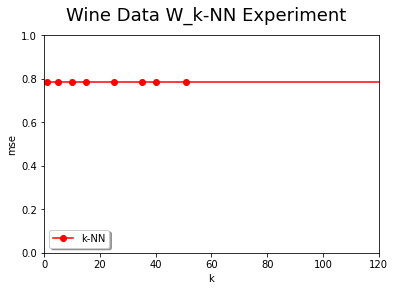

In [357]:
#W_KNN GRAPH TUNED
k_vals = [1,5,10,15,25,35,40,51,130,140]
kNN_accuracies = []
for k in k_vals:
  
  current_accuracy = metrics.mean_squared_error(w_knn_Pred, test_sln)
  kNN_accuracies.append(current_accuracy)

plt.suptitle('Wine Data W_k-NN Experiment', fontsize = 18)
plt.xlabel('k')
plt.ylabel('mse')
plt.plot(k_vals,kNN_accuracies, 'ro-', label = 'k-NN')
plt.legend(loc='lower left', shadow = True)
plt.axis([0, 120, 0, 1])

plt.show()

In [358]:
# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)
#train_data_normalized

In [359]:
3#Create model
knn = neighbors.KNeighborsRegressor(n_neighbors= 10)
w_knn = neighbors.KNeighborsRegressor(n_neighbors= 30, weights = 'distance')
dt = tree.DecisionTreeRegressor(max_depth= 5)
R_forest = RandomForestRegressor(n_estimators = 30)

4#Call fit()
knn.fit(train_data_normalized, train_sln)
w_knn.fit(train_data_normalized, train_sln)
dt.fit(train_data_normalized, train_sln)
R_forest.fit(train_data_normalized, train_sln)

5#Get Predictions
knn_Pred_Par = knn.predict(test_data_normalized)
w_knn_Pred_Par = w_knn.predict(test_data_normalized)
dt_Pred_Par = dt.predict(test_data_normalized)
R_forest_Pred_Par = R_forest.predict(test_data_normalized)

#6 Evaluate the model
from sklearn import metrics
print("Normalized KNN MSE: ", metrics.mean_squared_error(knn_Pred_Par, test_sln))
print("Normalized W_KNN MSE: ", metrics.mean_squared_error(w_knn_Pred_Par, test_sln))
print("Normalized Decision Tree MSE: ", metrics.mean_squared_error(dt_Pred_Par, test_sln))
print("Normalized Forest MSE: ", metrics.mean_squared_error(R_forest_Pred_Par, test_sln))

Normalized KNN MSE:  0.4399363107658715
Normalized W_KNN MSE:  0.3791331684833124
Normalized Decision Tree MSE:  0.4702480628801191
Normalized Forest MSE:  0.2572908515911724


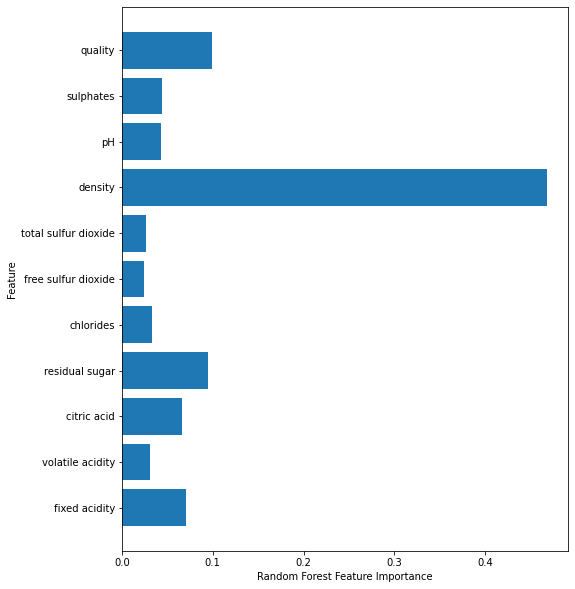

In [360]:
#FEATURE IMPORTANCES CHART
import matplotlib.pyplot as plt
%matplotlib inline

index = range(len(predictors)) #creates a list of numbers the right size to use as the index

plt.figure(figsize=(8,10)) #making the table a bit bigger so the text is readable
plt.barh(index,R_forest.feature_importances_,height=0.8) #horizontal bar chart
plt.ylabel('Feature')
plt.yticks(index,predictors) #put the feature names at the y tick marks
plt.xlabel("Random Forest Feature Importance")
plt.show()

# 8. Results
After you conduct your learning experiment, summarize the results you got. Include visualizations (i.e. graphs) where appropriate.  How did you find the best k, n, m or other variables that you needed to tune. 

You should be able to fill in this table (but it doesn't count as a visualization): 

| **Model**     | **Non-Normalized** | **Normalized** | **Parameter Tuned** |
|---------------|--------------------|----------------|---------------------|
| kNN           |       0.94         |      0.44      |   n_neighbors = 10  |
| w-kNN         |       0.78         |      0.38      |   n_neighbors = 30  |
| decision tree |       0.42         |      0.47      |   max_depth =5      |
| random forest |       0.25         |      0.25      |   n_estimators = 5  |

In [361]:
def regressions_all_kNN(test_data,train_data,k):
   return test_data.apply(regression_kNN,args=(train_data,k),axis=1)

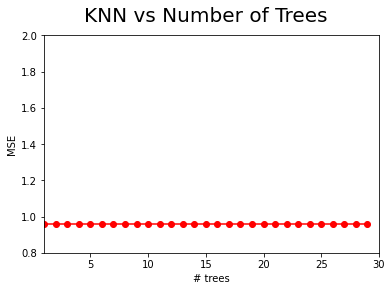

In [362]:
#RANDOM FOREST GRAPH
import matplotlib.pyplot as plt

def number_of_trees(n_estimator_values):
  Randomforest_accuracies = []
  for m in n_estimator_values:
    curr_Randomforest = neighbors.KNeighborsRegressor(n_neighbors = 10)
    curr_Randomforest.fit(train_data, train_sln)
    curr_predictions = curr_Randomforest.predict(test_data)
    curr_accuracy = metrics.mean_squared_error(test_sln, curr_predictions)
    Randomforest_accuracies.append(curr_accuracy)
  plt.suptitle('KNN vs Number of Trees', fontsize = 20)
  plt.xlabel('# trees')
  plt.ylabel('MSE')
  plt.plot(n_estimator_values, Randomforest_accuracies, 'ro-')
  plt.axis([1,n_estimator_values[-1]+1,.8,2])

  plt.show()
number_of_trees(range(1,30))

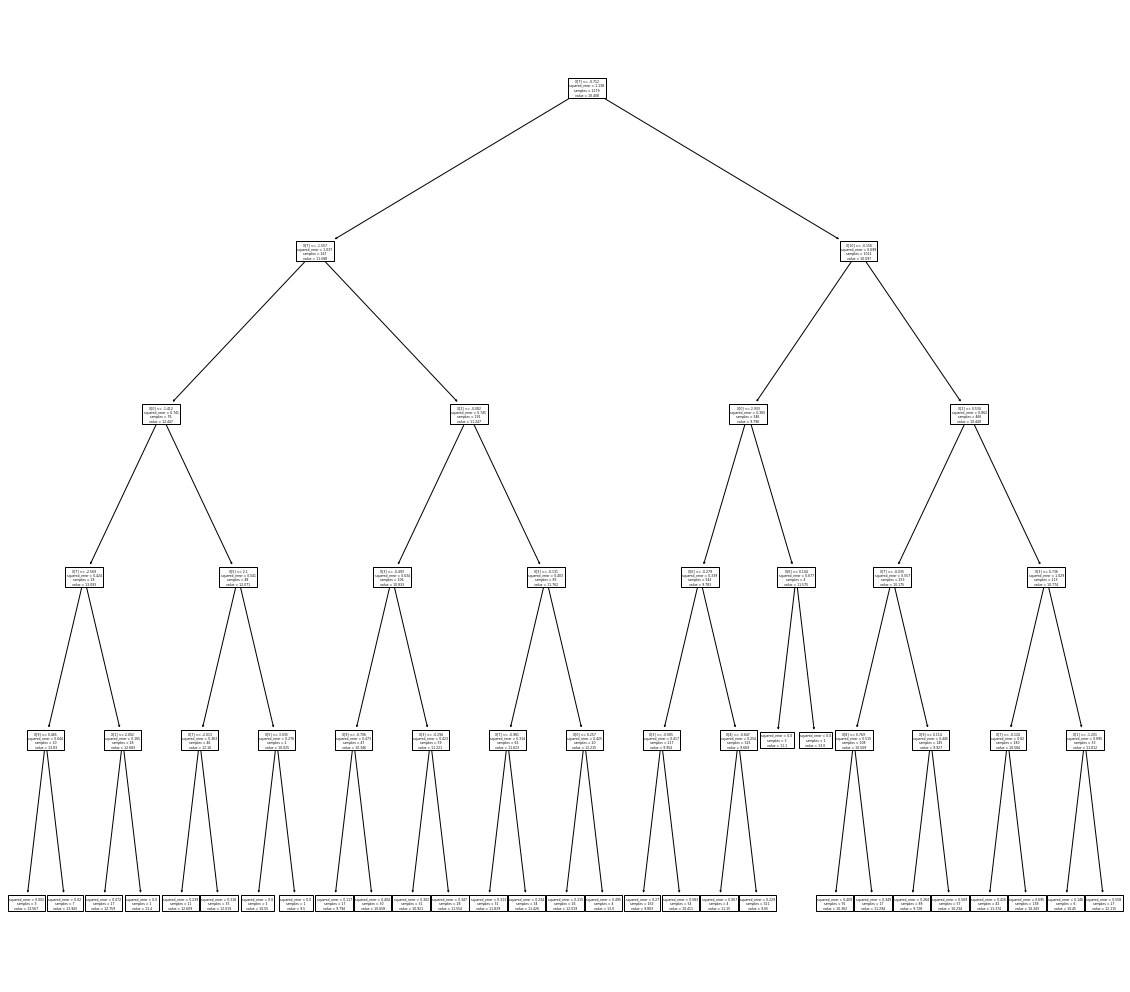

In [363]:
# Include code to show your results (graphs, etc)
# DECISION TREE GRAPH
import matplotlib.pyplot as plt

plt.figure(figsize=(20,18)) # Makes it so the graph isn't tiny
tree.plot_tree(dt); #if you remove the ;, you'll get more information about the tree


# 9. Bumps in the Road:
I've always found that I learn the most from these kinds of projects, and from where I get stuck. Keep track of these moments that you get stuck and chronicle them here: 

What challenges did you encounter? How did you overcome these challenges? Did you have to adapt your strategy to account for these challenges? Why or why not?


Not being familiar with Scikit, it was frustrating at first because it was something new, but then everything got easier after I learned how to use it through looking back at the class notes and youtube videos. I'm positive my graphs aren't good because the MSE doesn't change on the graph as K gets bigger so that's something I need to figure out still.

# 10. Conclusions

You don't necessarily have to answer all of these questions, but include a discussion of what you learned from this project. Discussions may include: 
- What insights/recommendations do you have? 
- What did you find that was interesting? 
- Which model was your best model, which models didn't work well?
- Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

For this project, I chose "alcohol" as my target variable and use other columns to see how much influence they have in predicting alcohol column. All my datasets are numeric, so I did regression and I used MSE to test my models. 


For non-normalized data, the Mean Squared Error was very close to 1 for K Nearest Neighbor and Weighted K-Nearest Neighbor. However, they significantly decreased below 0.5 after being normalized. On the other hand, Decision tree and Random Forest stayed about the same under 0.5 MSE for normalized and non normalized. The dummy MSE for the target variable was the largest and it was 1.125. Also, since we want our MSE to be as low as possible. Although all models worked really well after normalized,Random Forest is the best model because the MSE is about 0.25, which is close to being a perfect model. 